In [9]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Load the Dataset
df = pd.read_csv("cleaned_dataset.csv")

In [18]:
print(df.columns)

Index(['Date', 'Location', 'Operator', 'Flight #', 'AC Type', 'Registration',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew'],
      dtype='object')


## Fatalities Over Time

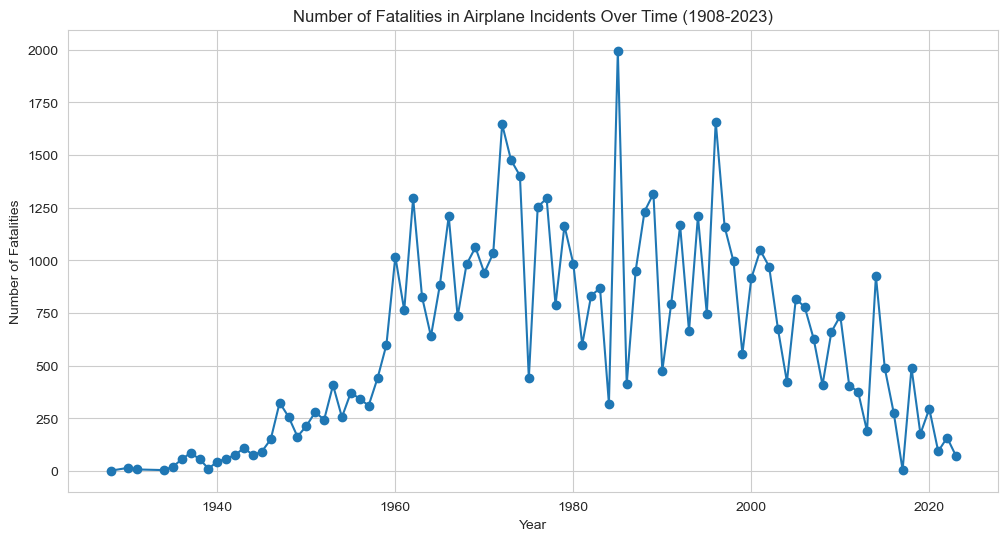

In [11]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Group by year and sum fatalities
yearly_fatalities = df.groupby(df['Date'].dt.year)['Fatalities'].sum().reset_index()
# Plotting the line chart for fatalities over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_fatalities['Date'], yearly_fatalities['Fatalities'], marker='o', linestyle='-')
plt.title('Number of Fatalities in Airplane Incidents Over Time (1908-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

## Periods with Higher Fatality Rate

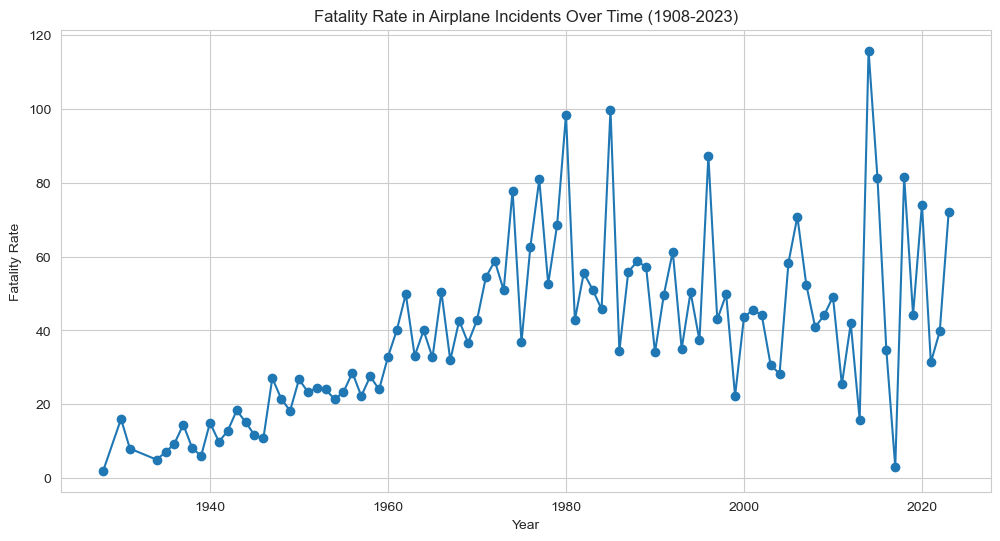

In [29]:
# Group by year and calculate total incidents and fatalities
yearly_stats = df.groupby(df['Date'].dt.year).agg(Incidents=('Date', 'count'), Fatalities=('Fatalities', 'sum'))

# Rename the 'Incidents' column if needed
# yearly_stats = yearly_stats.rename(columns={'Incidents': 'Total Incidents'})

# Create a new DataFrame for fatality rate analysis
fatality_rate_stats = yearly_stats.copy()

# Calculate fatality rate
fatality_rate_stats['Fatality Rate'] = fatality_rate_stats['Fatalities'] / fatality_rate_stats['Incidents']

# Plotting the line chart for fatality rate over time
plt.figure(figsize=(12, 6))
plt.plot(fatality_rate_stats.index, fatality_rate_stats['Fatality Rate'], marker='o', linestyle='-')
plt.title('Fatality Rate in Airplane Incidents Over Time (1908-2023)')
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.grid(True)
plt.show()